In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [3]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy


# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model


In [4]:
student_model1 = load_model('D:\Mahir\Brain\Brain-Tumor-Classification-Research\Final Experiments\Multi Teacher Single Student\d2\Tiny Resnet\Multi_resnet_d2.h5')

In [5]:
student_model2 = load_model('D:\Mahir\Brain\Brain-Tumor-Classification-Research\Final Experiments\Multi Teacher Single Student\d2\Tiny Xception\Multi_xception_d2.h5')

In [6]:
student_model3 = load_model('D:\Mahir\Brain\Brain-Tumor-Classification-Research\Final Experiments\Multi Teacher Single Student\d2\Tiny Densenet\Multi_Densenet_d2.h5')

In [24]:
# code to save the figures as high-res PNGs
import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "Images/EDA"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
# Set seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [8]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [9]:
test_data = test_df('D:\Mahir\Datasets\Merged Dataset 2\Testing')

In [10]:
test_data

,Class Path,Class
0,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
1,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
2,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
3,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
4,D:\Mahir\Datasets\Merged Dataset 2\Testing\gli...,glioma
...,...,...
4322,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4323,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4324,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary
4325,D:\Mahir\Datasets\Merged Dataset 2\Testing\pit...,pituitary


In [11]:
test_path = 'D:\Mahir\Datasets\Merged Dataset 2\Testing'

In [12]:
# Image size
image_size = (160, 160)

# Training batch size
batch_size = 32

# Data preprocessing without any augmentation, only rescaling and validation split
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5)

# Applying the generator to testing data, only rescaling
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(160, 160),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  subset='training',  # Uses the other 50% intended for testing
                                                  shuffle=False)

# Define a generator function to convert test_generator to a dataset
def test_gen():
    for i in range(len(test_generator)):
        x, y = test_generator[i]
        yield x, y

# Convert the generator into a tf.data.Dataset
test_dataset = tf.data.Dataset.from_generator(
    test_gen,
    output_signature=(
        tf.TensorSpec(shape=(None, *image_size, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, test_generator.num_classes), dtype=tf.float32),
    ),
)

# Inspect dataset
print(f"Number of classes: {test_generator.num_classes}")
print(f"Steps per epoch: {len(test_generator)}")


Found 2165 images belonging to 4 classes.
Number of classes: 4
Steps per epoch: 68


In [13]:
test_score = student_model1.evaluate(test_dataset, verbose=1)

print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

68/68 [==============================] - 9s 91ms/step - loss: 4.0376 - accuracy: 0.9557
Test Loss: 4.0376
Test Accuracy: 95.57%


In [14]:
test_score = student_model2.evaluate(test_generator, verbose=1)

print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

68/68 [==============================] - 7s 89ms/step - loss: 0.4624 - accuracy: 0.9557 - precision_2: 0.9604 - recall_2: 0.9520
Test Loss: 0.4624
Test Accuracy: 95.57%


In [15]:
test_score = student_model3.evaluate(test_generator, verbose=1)

print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

68/68 [==============================] - 7s 87ms/step - loss: 0.6199 - accuracy: 0.9524 - precision_2: 0.9541 - recall_2: 0.9510
Test Loss: 0.6199
Test Accuracy: 95.24%


In [16]:
import numpy as np

def average_ensemble(models, test_dataset, num_samples, batch_size):
    """
    Perform averaging ensemble on multiple models with debug printing.

    Args:
        models: List of trained models.
        test_dataset: Test dataset for evaluation.
        num_samples: Total number of samples in the test dataset.
        batch_size: Batch size for the test dataset.

    Returns:
        Accuracy of the ensemble model.
    """
    y_true = []
    y_pred_ensemble = []
    batch_count = 0

    # Calculate the total number of steps
    steps_per_epoch = np.ceil(num_samples / batch_size).astype(int)

    for x_batch, y_batch in test_dataset:
        batch_count += 1

        # Stop after processing all images
        if batch_count > steps_per_epoch:
            break

        # Collect true labels
        true_labels = np.argmax(y_batch.numpy(), axis=1)
        y_true.extend(true_labels)

        # Get predictions from each model for the current batch
        batch_predictions = [model.predict(x_batch, verbose=0) for model in models]

        # Average the predictions across all models
        avg_predictions = np.mean(batch_predictions, axis=0)

        # Get the predicted class for each sample
        batch_preds = np.argmax(avg_predictions, axis=1)
        y_pred_ensemble.extend(batch_preds)

        # Print batch progress
        print(f"Batch {batch_count}/{steps_per_epoch}: Processed {len(x_batch)} samples.")
        print(f"  True Labels (first 5): {true_labels[:5]}")
        print(f"  Predicted Labels (first 5): {batch_preds[:5]}")

    # Calculate accuracy
    y_true = np.array(y_true)
    y_pred_ensemble = np.array(y_pred_ensemble)
    accuracy = np.mean(y_true == y_pred_ensemble)

    # Final accuracy
    print(f"\nFinal Ensemble Test Accuracy: {accuracy:.4f}")

    return accuracy, y_true, y_pred_ensemble




In [17]:
# S1, S2, S3
num_samples = 2165
batch_size = 32
test_accuracy, y_true, y_pred = average_ensemble(
    [student_model1, student_model2, student_model3],
    test_dataset,
    num_samples,
    batch_size
)
print(f"Ensemble Test Accuracy (S1, S2, S3): {test_accuracy:.4f}")

Batch 1/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 2/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 3/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 4/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 5/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 6/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 7/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 8/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 9/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first

In [18]:
# S1, S2
num_samples = 2165
batch_size = 32
test_accuracy, y_true, y_pred = average_ensemble(
    [student_model1, student_model2],
    test_dataset,
    num_samples,
    batch_size
)
print(f"Ensemble Test Accuracy (S1, S2): {test_accuracy:.4f}")

Batch 1/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 2/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 3/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 4/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 5/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 6/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 7/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 8/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 9/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first

In [19]:
# S1, S3
num_samples = 2165
batch_size = 32
test_accuracy, y_true, y_pred = average_ensemble(
    [student_model1, student_model3],
    test_dataset,
    num_samples,
    batch_size
)
print(f"Ensemble Test Accuracy (S1, S3): {test_accuracy:.4f}")

Batch 1/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 2/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 3/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 4/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 5/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 6/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 7/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 8/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 9/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first

In [20]:
# S2, S3
num_samples = 2165
batch_size = 32
test_accuracy, y_true, y_pred = average_ensemble(
    [student_model2, student_model3],
    test_dataset,
    num_samples,
    batch_size
)
print(f"Ensemble Test Accuracy (S2, S3): {test_accuracy:.4f}")

Batch 1/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 2/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 3/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 4/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 5/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 6/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 7/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 8/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 9/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first

Batch 1/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 2/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 3/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 4/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 5/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 6/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 7/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 8/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first 5): [0 0 0 0 0]
Batch 9/68: Processed 32 samples.
  True Labels (first 5): [0 0 0 0 0]
  Predicted Labels (first

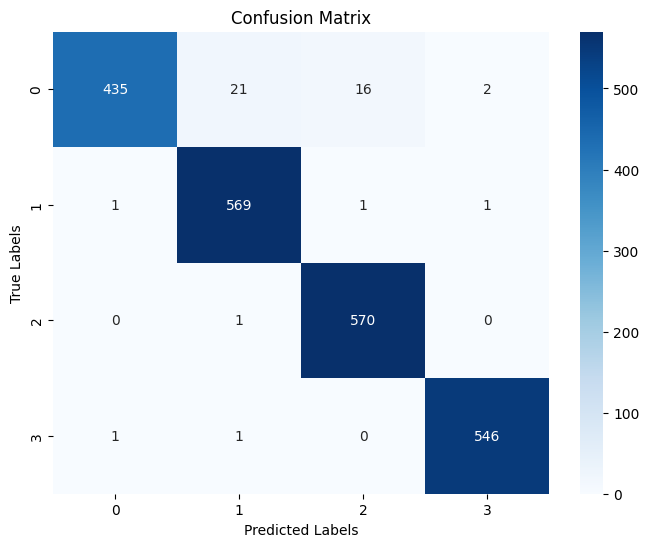


Classification Report:
               precision    recall  f1-score   support

           0      0.995     0.918     0.955       474
           1      0.961     0.995     0.978       572
           2      0.971     0.998     0.984       571
           3      0.995     0.996     0.995       548

    accuracy                          0.979      2165
   macro avg      0.981     0.977     0.978      2165
weighted avg      0.980     0.979     0.979      2165



In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def average_ensemble(models, test_dataset, num_samples, batch_size):
    """
    Perform averaging ensemble on multiple models with debug printing.

    Args:
        models: List of trained models.
        test_dataset: Test dataset for evaluation.
        num_samples: Total number of samples in the test dataset.
        batch_size: Batch size for the test dataset.

    Returns:
        Accuracy of the ensemble model, true labels, and predicted labels.
    """
    y_true = []
    y_pred_ensemble = []
    batch_count = 0

    # Calculate the total number of steps
    steps_per_epoch = np.ceil(num_samples / batch_size).astype(int)

    for x_batch, y_batch in test_dataset:
        batch_count += 1

        # Stop after processing all images
        if batch_count > steps_per_epoch:
            break

        # Collect true labels
        true_labels = np.argmax(y_batch.numpy(), axis=1)
        y_true.extend(true_labels)

        # Get predictions from each model for the current batch
        batch_predictions = [model.predict(x_batch, verbose=0) for model in models]

        # Average the predictions across all models
        avg_predictions = np.mean(batch_predictions, axis=0)

        # Get the predicted class for each sample
        batch_preds = np.argmax(avg_predictions, axis=1)
        y_pred_ensemble.extend(batch_preds)

        # Print batch progress
        print(f"Batch {batch_count}/{steps_per_epoch}: Processed {len(x_batch)} samples.")
        print(f"  True Labels (first 5): {true_labels[:5]}")
        print(f"  Predicted Labels (first 5): {batch_preds[:5]}")

    # Calculate accuracy
    y_true = np.array(y_true)
    y_pred_ensemble = np.array(y_pred_ensemble)
    accuracy = np.mean(y_true == y_pred_ensemble)

    # Final accuracy
    print(f"\nFinal Ensemble Test Accuracy: {accuracy:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred_ensemble)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(cm.shape[0]), yticklabels=np.arange(cm.shape[0]))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Save the plot with 300 DPI resolution
    plt.savefig("Average_ensemble_d2_CM.png", dpi=300)  # Save as PNG with 300 DPI
    plt.show()

    # Print classification report
    report = classification_report(y_true, y_pred_ensemble, digits=3)
    print("\nClassification Report:\n", report)

    return accuracy, y_true, y_pred_ensemble

# Example usage
accuracy, y_true, y_pred_ensemble = average_ensemble(
    [student_model1, student_model2, student_model3], 
    test_dataset, 
    num_samples, 
    batch_size
)


In [22]:
# # Define weights for the models
# weights = [0.6, 0.4]  # Example: Assign 60% weight to student_model1 and 40% to student_model2

# # Evaluate weighted ensemble
# test_accuracy_weighted, y_true_weighted, y_pred_weighted = weighted_ensemble([student_model1, student_model2], weights, test_dataset)
# print(f"Weighted Ensemble Test Accuracy: {test_accuracy_weighted:.4f}")
